In [1]:
# to read and wrangle data
import pandas as pd

# to create spatial data
import geopandas as gpd

# for basemaps
import contextily as ctx

# For spatial statistics
import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

from splot import esda as esdaplot

import libpysal as lps

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px

import seaborn

from shapely.geometry import Point
%matplotlib inline

from matplotlib.font_manager import FontProperties

In [2]:
#Read shape file of "Persons in Communal Establishments Administrative County Census 2016" data set
counties_1=gpd.read_file('/Coordinates/2016 Data/Persons_in_Communal_Establishments%2C_Administrative_County%2C_Census_2016%2C_Theme_7.1%2C_Ireland%2C_2016%2C_CSO_%26_OSi/Persons_in_Communal_Establishments%2C_Administrative_County%2C_Census_2016%2C_Theme_7.1%2C_Ireland%2C_2016%2C_CSO_%26_OSi.shp')

In [3]:
#Show contents of variable counties_1
counties_1

,OBJECTID,COUNTY,ENGLISH,CONTAE,GAEILGE,PROVINCE,ID,CENTROID_X,CENTROID_Y,GlobalID,...,T6_8_O,T6_8_TA,T6_8_UHH,T6_8_OVD,T6_8_T,T7_1_NE,T7_1_NP,Shape__Are,Shape__Len,geometry
0,1,DUBLIN,DUBLIN CITY COUNCIL,Baile Átha Cliath,None,Leinster,265011,712153,735780,d2d7aabc-0015-46b1-96f7-495be8dc41d6,...,213224,7883,1022,18424,240553,736,32642,3.601898e+08,1.629777e+05,"MULTIPOLYGON (((-6.15976 53.34115, -6.16241 53..."
1,2,GALWAY,GALWAY CITY COUNCIL,Gaillimh,None,Connacht,65011,530363,726364,7b9bb987-673a-4d76-8bc4-93e035d93952,...,29313,1368,325,2841,33847,144,4404,1.417070e+08,9.714417e+04,"MULTIPOLYGON (((-9.05618 53.25405, -9.05446 53..."
2,3,CORK,CORK CITY COUNCIL,Corcaigh,None,Munster,45511,567611,571949,758c405d-a482-4993-b787-92b6debad85d,...,49874,1524,70,4292,55760,148,4900,1.038111e+08,5.885441e+04,"POLYGON ((-8.46746 51.92088, -8.46362 51.92043..."
3,4,LAOIS,LAOIS COUNTY COUNCIL,Laois,None,Leinster,105001,644825,693938,d11c0ad1-f6cc-4ccf-a86c-049dfad363ad,...,29075,559,153,3007,32794,43,2178,4.735742e+09,4.428209e+05,"POLYGON ((-7.09014 53.00146, -7.08664 52.99827..."
4,5,ROSCOMMON,ROSCOMMON COUNTY COUNCIL,Ros Comáin,None,Connacht,195001,582317,778883,ff3d40df-98aa-4dd1-8c17-b85d5e96353e,...,24081,656,1225,5323,31285,41,1405,7.264164e+09,7.052873e+05,"POLYGON ((-7.91806 53.82917, -7.92091 53.82480..."
5,6,WATERFORD,WATERFORD CITY AND COUNTY COUNCIL,Port Láirge,None,Munster,225002,625792,604797,7f7c2472-0958-4990-b633-f2d21704abb6,...,43719,1436,2142,5194,52491,100,3099,4.931524e+09,6.565745e+05,"MULTIPOLYGON (((-6.98139 52.15953, -6.98140 52..."
6,7,DUBLIN,SOUTH DUBLIN COUNTY COUNCIL,Baile Átha Cliath,None,Leinster,265003,704391,726785,0f31fc42-d01b-4122-a514-7623993c63f2,...,92564,2293,35,3495,98387,109,5000,6.238325e+08,1.511710e+05,"POLYGON ((-6.27449 53.30076, -6.27662 53.29985..."
7,8,LOUTH,LOUTH COUNTY COUNCIL,Lú,None,Leinster,145001,699245,798377,da0b0d49-3486-4ac6-a411-87b8f8891e0b,...,45528,1158,761,3952,51399,124,2405,2.376600e+09,4.059260e+05,"MULTIPOLYGON (((-6.17241 54.03960, -6.17253 54..."
8,9,MONAGHAN,MONAGHAN COUNTY COUNCIL,Muineachán,None,Ulster,175001,669141,824829,7b6ce162-7a60-4d14-88e9-8bea277175e3,...,21691,494,242,2884,25311,31,952,3.767381e+09,4.874093e+05,"POLYGON ((-7.01936 54.09910, -7.02356 54.09923..."
9,10,MEATH,MEATH COUNTY COUNCIL,An Mhí,None,Leinster,165001,688919,762584,5218b5fd-02a6-41a3-a78f-6679750ea833,...,63989,1785,235,4640,70649,98,3108,6.649400e+09,6.345687e+05,"POLYGON ((-6.98355 53.59643, -6.97987 53.60592..."


In [4]:
#Create a new geodataframe that is a subset of counties_1
counties_2016=counties_1[['COUNTY','ENGLISH','CENTROID_X','CENTROID_Y','geometry']]

In [5]:
#Show top 5 records of counties_2016
counties_2016.head(5)

,COUNTY,ENGLISH,CENTROID_X,CENTROID_Y,geometry
0,DUBLIN,DUBLIN CITY COUNCIL,712153,735780,"MULTIPOLYGON (((-6.15976 53.34115, -6.16241 53..."
1,GALWAY,GALWAY CITY COUNCIL,530363,726364,"MULTIPOLYGON (((-9.05618 53.25405, -9.05446 53..."
2,CORK,CORK CITY COUNCIL,567611,571949,"POLYGON ((-8.46746 51.92088, -8.46362 51.92043..."
3,LAOIS,LAOIS COUNTY COUNCIL,644825,693938,"POLYGON ((-7.09014 53.00146, -7.08664 52.99827..."
4,ROSCOMMON,ROSCOMMON COUNTY COUNCIL,582317,778883,"POLYGON ((-7.91806 53.82917, -7.92091 53.82480..."


In [6]:
# get the layers into a web mercator projection
# reproject to web mercator
counties_2016 = counties_2016.to_crs(epsg=3857)
#Find the center point
counties_2016['Center_point'] = counties_2016['geometry'].centroid
#Extract lat and lon of every county from the centerpoint
counties_2016["lat"] = counties_2016.Center_point.map(lambda p: p.x)
counties_2016["long"] = counties_2016.Center_point.map(lambda p: p.y)

In [7]:
#show contents of counties_2016
counties_2016

,COUNTY,ENGLISH,CENTROID_X,CENTROID_Y,geometry,Center_point,lat,long
0,DUBLIN,DUBLIN CITY COUNCIL,712153,735780,"MULTIPOLYGON (((-685701.882 7046351.751, -6859...",POINT (-695913.943 7049521.782),-6.959139e+05,7.049522e+06
1,GALWAY,GALWAY CITY COUNCIL,530363,726364,"MULTIPOLYGON (((-1008129.350 7030129.391, -100...",POINT (-1007375.871 7035562.042),-1.007376e+06,7.035562e+06
2,CORK,CORK CITY COUNCIL,567611,571949,"POLYGON ((-942593.541 6785832.533, -942165.686...",POINT (-942515.275 6781350.070),-9.425153e+05,6.781350e+06
3,LAOIS,LAOIS COUNTY COUNCIL,644825,693938,"POLYGON ((-789270.256 6983267.372, -788881.255...",POINT (-818848.547 6980050.135),-8.188485e+05,6.980050e+06
4,ROSCOMMON,ROSCOMMON COUNTY COUNCIL,582317,778883,"POLYGON ((-881434.297 7137870.217, -881751.893...",POINT (-918025.094 7118257.057),-9.180251e+05,7.118257e+06
5,WATERFORD,WATERFORD CITY AND COUNTY COUNCIL,625792,604797,"MULTIPOLYGON (((-777165.312 6829021.813, -7771...",POINT (-845680.668 6831601.956),-8.456807e+05,6.831602e+06
6,DUBLIN,SOUTH DUBLIN COUNTY COUNCIL,704391,726785,"POLYGON ((-698473.246 7038825.755, -698710.649...",POINT (-712907.054 7035083.182),-7.129071e+05,7.035083e+06
7,LOUTH,LOUTH COUNTY COUNCIL,699245,798377,"MULTIPOLYGON (((-687109.979 7177660.306, -6871...",POINT (-713995.755 7153153.623),-7.139958e+05,7.153154e+06
8,MONAGHAN,MONAGHAN COUNTY COUNCIL,669141,824829,"POLYGON ((-781391.226 7188947.967, -781859.154...",POINT (-770745.168 7199698.477),-7.707452e+05,7.199698e+06
9,MEATH,MEATH COUNTY COUNCIL,688919,762584,"POLYGON ((-777404.766 7094091.861, -776995.773...",POINT (-749412.928 7100794.960),-7.494129e+05,7.100795e+06


In [8]:
#Rename the cells names into the "English Column" into the "Name" of every county
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['DUBLIN CITY COUNCIL'],'DUBLIN CITY')
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['GALWAY CITY COUNCIL'],'GALWAY CITY')
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['CORK CITY COUNCIL'],'CORK CITY')
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['LAOIS COUNTY COUNCIL'],'LAOIS')
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['ROSCOMMON COUNTY COUNCIL'],'ROSCOMMON')
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['WATERFORD CITY AND COUNTY COUNCIL'],'WATERFORD')
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['SOUTH DUBLIN COUNTY COUNCIL'],'DUBLIN_SOUTH')
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['LOUTH COUNTY COUNCIL'],'LOUTH')
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['MONAGHAN COUNTY COUNCIL'],'MONAGHAN')
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['MEATH COUNTY COUNCIL'],'MEATH')
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['FINGAL COUNTY COUNCIL'],'DUBLIN_FIN')
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['LEITRIM COUNTY COUNCIL'],'LEITRIM')
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['WESTMEATH COUNTY COUNCIL'],'WESTMEATH')
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['CORK COUNTY COUNCIL'],'CORK')
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['DONEGAL COUNTY COUNCIL'],'DONEGAL')
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['DUN LAOGHAIRE-RATHDOWN COUNTY COUNCIL'],'DUBLIN_DUN')
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['LONGFORD COUNTY COUNCIL'],'LONGFORD')
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['GALWAY COUNTY COUNCIL'],'GALWAY')
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['KILKENNY COUNTY COUNCIL'],'KILKENNY')
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['SLIGO COUNTY COUNCIL'],'SLIGO')
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['OFFALY COUNTY COUNCIL'],'OFFALY')
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['WICKLOW COUNTY COUNCIL'],'WICKLOW')
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['WEXFORD COUNTY COUNCIL'],'WEXFORD')
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['KILDARE COUNTY COUNCIL'],'KILDARE')
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['KERRY COUNTY COUNCIL'],'KERRY')
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['TIPPERARY COUNTY COUNCIL'],'TIPPERARY')
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['LIMERICK CITY AND COUNTY COUNCIL'],'LIMERICK')
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['CAVAN COUNTY COUNCIL'],'CAVAN')
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['MAYO COUNTY COUNCIL'],'MAYO')
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['CLARE COUNTY COUNCIL'],'CLARE')
counties_2016['ENGLISH'] = counties_2016['ENGLISH'].replace(['CARLOW COUNTY COUNCIL'],'CARLOW')


In [9]:
#Show first 5 records of counties_2016
counties_2016.head(5)

,COUNTY,ENGLISH,CENTROID_X,CENTROID_Y,geometry,Center_point,lat,long
0,DUBLIN,DUBLIN CITY,712153,735780,"MULTIPOLYGON (((-685701.882 7046351.751, -6859...",POINT (-695913.943 7049521.782),-6.959139e+05,7.049522e+06
1,GALWAY,GALWAY CITY,530363,726364,"MULTIPOLYGON (((-1008129.350 7030129.391, -100...",POINT (-1007375.871 7035562.042),-1.007376e+06,7.035562e+06
2,CORK,CORK CITY,567611,571949,"POLYGON ((-942593.541 6785832.533, -942165.686...",POINT (-942515.275 6781350.070),-9.425153e+05,6.781350e+06
3,LAOIS,LAOIS,644825,693938,"POLYGON ((-789270.256 6983267.372, -788881.255...",POINT (-818848.547 6980050.135),-8.188485e+05,6.980050e+06
4,ROSCOMMON,ROSCOMMON,582317,778883,"POLYGON ((-881434.297 7137870.217, -881751.893...",POINT (-918025.094 7118257.057),-9.180251e+05,7.118257e+06


In [10]:
#subset the counties_2016 geodataframe with only the name, geometry, longitude and latitude of a county
counties_2016=counties_2016[["ENGLISH","geometry","lat","long"]]

In [11]:
#show contents of counties_2016
counties_2016

,ENGLISH,geometry,lat,long
0,DUBLIN CITY,"MULTIPOLYGON (((-685701.882 7046351.751, -6859...",-6.959139e+05,7.049522e+06
1,GALWAY CITY,"MULTIPOLYGON (((-1008129.350 7030129.391, -100...",-1.007376e+06,7.035562e+06
2,CORK CITY,"POLYGON ((-942593.541 6785832.533, -942165.686...",-9.425153e+05,6.781350e+06
3,LAOIS,"POLYGON ((-789270.256 6983267.372, -788881.255...",-8.188485e+05,6.980050e+06
4,ROSCOMMON,"POLYGON ((-881434.297 7137870.217, -881751.893...",-9.180251e+05,7.118257e+06
5,WATERFORD,"MULTIPOLYGON (((-777165.312 6829021.813, -7771...",-8.456807e+05,6.831602e+06
6,DUBLIN_SOUTH,"POLYGON ((-698473.246 7038825.755, -698710.649...",-7.129071e+05,7.035083e+06
7,LOUTH,"MULTIPOLYGON (((-687109.979 7177660.306, -6871...",-7.139958e+05,7.153154e+06
8,MONAGHAN,"POLYGON ((-781391.226 7188947.967, -781859.154...",-7.707452e+05,7.199698e+06
9,MEATH,"POLYGON ((-777404.766 7094091.861, -776995.773...",-7.494129e+05,7.100795e+06


In [12]:
#Rename the column of the county from English into County
counties_2016=counties_2016.rename(columns = {'ENGLISH':'COUNTY'})

In [13]:
#Remove Tipperary & Limerick from the dataframe and put the data into a new dataframe called counties_updated
counties_updated=counties_2016.drop([25,26])

In [14]:
#Import data from shape file Constituency Boundaries 2011
counties_2011=gpd.read_file('/Coordinates/2011 Data/Constituency/Constituency_Boundaries_SAPS2011.shp')

In [15]:
#Show data in counties
counties_2011

,CON_2007,CON_NAME,NO_MEMBERS,Male2011,Female2011,Total2011,HS2011,PPOcc2011,Unocc2011,Vacant2011,PCVac2011,geometry
0,31,Limerick,3,41318.0,40361.0,81679.0,33746.0,28703.0,5043.0,4563.0,13.5,"POLYGON ((116791.828 151403.648, 116794.676 15..."
1,33,Louth,5,70797.0,72475.0,143272.0,59236.0,50978.0,8258.0,7144.0,12.1,"POLYGON ((317873.347 267609.717, 317861.238 26..."
2,01,Carlow-Kilkenny,5,72989.0,72670.0,145659.0,60316.0,51629.0,8687.0,7565.0,12.5,"POLYGON ((271452.721 181506.890, 271472.548 18..."
3,39,Tipperary North,3,42891.0,42133.0,85024.0,36822.0,30879.0,5943.0,5333.0,14.5,"POLYGON ((222041.904 170039.513, 222045.480 17..."
4,34,Mayo,5,65420.0,65218.0,130638.0,65792.0,48304.0,17488.0,16230.0,24.7,"MULTIPOLYGON (((48194.087 315622.618, 48194.98..."
5,41,Waterford,4,55668.0,56530.0,112198.0,51773.0,41978.0,9795.0,8555.0,16.5,"MULTIPOLYGON (((230558.678 123388.148, 230583...."
6,26,Kerry South,3,39085.0,38886.0,77971.0,42361.0,28288.0,14073.0,13346.0,31.5,"MULTIPOLYGON (((18150.159 95030.575, 18153.074..."
7,29,Laois-Offaly,5,76681.0,76144.0,152825.0,61648.0,53126.0,8522.0,7451.0,12.1,"POLYGON ((253749.193 241742.802, 253749.715 24..."
8,30,Limerick City,4,50568.0,52070.0,102638.0,44535.0,38517.0,6018.0,4640.0,10.4,"POLYGON ((167918.849 166945.103, 167921.841 16..."
9,36,Meath West,3,42440.0,43110.0,85550.0,33409.0,29414.0,3995.0,3350.0,10.0,"POLYGON ((269170.889 281833.104, 269145.853 28..."


In [16]:
#Make a subset of the counties dataframe with only the name and geometry of a county
counties_2011=counties_2011[['CON_NAME','geometry']]

In [17]:
#Make a new subset of counties 1 that only contain Limerick, Limerick city, Tipperary north & Tipperary south
counties_2=counties_2011.iloc[[0,3,8,13],:]

In [18]:
#show contents of new geodataframe: counties_2
counties_2

,CON_NAME,geometry
0,Limerick,"POLYGON ((116791.828 151403.648, 116794.676 15..."
3,Tipperary North,"POLYGON ((222041.904 170039.513, 222045.480 17..."
8,Limerick City,"POLYGON ((167918.849 166945.103, 167921.841 16..."
13,Tipperary South,"POLYGON ((235226.505 150170.938, 235234.020 15..."


In [19]:
#Rename "con_name" column to "County"
counties_2=counties_2.rename(columns={'CON_NAME':'COUNTY'})

In [20]:
#show contents of new geodataframe: counties_2
counties_2

,COUNTY,geometry
0,Limerick,"POLYGON ((116791.828 151403.648, 116794.676 15..."
3,Tipperary North,"POLYGON ((222041.904 170039.513, 222045.480 17..."
8,Limerick City,"POLYGON ((167918.849 166945.103, 167921.841 16..."
13,Tipperary South,"POLYGON ((235226.505 150170.938, 235234.020 15..."


In [21]:
# get the layers into a web mercator projection
# reproject to web mercator
counties_2 = counties_2.to_crs(epsg=3857)
#Find the center point of counties
counties_2['Center_point'] = counties_2['geometry'].centroid
#Extract lat and lon from the centerpoint
counties_2["lat"] = counties_2.Center_point.map(lambda p: p.x)
counties_2["long"] = counties_2.Center_point.map(lambda p: p.y)

In [22]:
#Show updated counties_2 with the center points, longitudes and latitudes
counties_2

,COUNTY,geometry,Center_point,lat,long
0,Limerick,"POLYGON ((-1027366.357 6910798.586, -1027361.7...",POINT (-965119.542 6890054.813),-965119.541866,6.890055e+06
3,Tipperary North,"POLYGON ((-854274.780 6942645.219, -854268.956...",POINT (-890765.063 6948386.368),-890765.062834,6.948386e+06
8,Limerick City,"POLYGON ((-943527.788 6937436.653, -943522.640...",POINT (-954301.909 6921070.418),-954301.908577,6.921070e+06
13,Tipperary South,"POLYGON ((-832761.232 6909727.141, -832749.353...",POINT (-876630.411 6876205.742),-876630.411055,6.876206e+06


In [23]:
#Make a new subset of counties_2 with the name of the county, geometry, latitude and longitude
counties_2=counties_2[["COUNTY","geometry","lat","long"]]

In [24]:
#show contents of counties_2
counties_2

,COUNTY,geometry,lat,long
0,Limerick,"POLYGON ((-1027366.357 6910798.586, -1027361.7...",-965119.541866,6.890055e+06
3,Tipperary North,"POLYGON ((-854274.780 6942645.219, -854268.956...",-890765.062834,6.948386e+06
8,Limerick City,"POLYGON ((-943527.788 6937436.653, -943522.640...",-954301.908577,6.921070e+06
13,Tipperary South,"POLYGON ((-832761.232 6909727.141, -832749.353...",-876630.411055,6.876206e+06


In [25]:
#Save counties_2 as a shape file
counties_2.to_file('/Coordinates/2011 Data/counties_21.shp')

/Users/DoaaAmin/opt/anaconda3/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [26]:
#Import shape file with info of remaining counties
rest_of_counties=gpd.read_file('/Coordinates/2011 Data/counties_21.shp')

In [27]:
#show contents of geodataframe: rest_of_counties
rest_of_counties

,COUNTY,lat,long,geometry
0,Limerick,-965119.541866,6.890055e+06,"POLYGON ((-1027366.357 6910798.586, -1027361.7..."
1,Tipperary North,-890765.062834,6.948386e+06,"POLYGON ((-854274.780 6942645.219, -854268.956..."
2,Limerick City,-954301.908577,6.921070e+06,"POLYGON ((-943527.788 6937436.653, -943522.640..."
3,Tipperary South,-876630.411055,6.876206e+06,"POLYGON ((-832761.232 6909727.141, -832749.353..."


In [28]:
#Concatenate all counties information into one geodataframe and name it: All_counties
All_counties=pd.concat([counties_updated,rest_of_counties], ignore_index=True)

In [29]:
#Show contents of All_counties (33)
All_counties

,COUNTY,geometry,lat,long
0,DUBLIN CITY,"MULTIPOLYGON (((-685701.882 7046351.751, -6859...",-6.959139e+05,7.049522e+06
1,GALWAY CITY,"MULTIPOLYGON (((-1008129.350 7030129.391, -100...",-1.007376e+06,7.035562e+06
2,CORK CITY,"POLYGON ((-942593.541 6785832.533, -942165.686...",-9.425153e+05,6.781350e+06
3,LAOIS,"POLYGON ((-789270.256 6983267.372, -788881.255...",-8.188485e+05,6.980050e+06
4,ROSCOMMON,"POLYGON ((-881434.297 7137870.217, -881751.893...",-9.180251e+05,7.118257e+06
5,WATERFORD,"MULTIPOLYGON (((-777165.312 6829021.813, -7771...",-8.456807e+05,6.831602e+06
6,DUBLIN_SOUTH,"POLYGON ((-698473.246 7038825.755, -698710.649...",-7.129071e+05,7.035083e+06
7,LOUTH,"MULTIPOLYGON (((-687109.979 7177660.306, -6871...",-7.139958e+05,7.153154e+06
8,MONAGHAN,"POLYGON ((-781391.226 7188947.967, -781859.154...",-7.707452e+05,7.199698e+06
9,MEATH,"POLYGON ((-777404.766 7094091.861, -776995.773...",-7.494129e+05,7.100795e+06


In [30]:
#Rename counties (case sensitive)
All_counties['COUNTY'] = All_counties['COUNTY'].replace(['DUBLIN CITY'],'Dublin_City')
All_counties['COUNTY'] = All_counties['COUNTY'].replace(['GALWAY CITY'],'Galway City')
All_counties['COUNTY'] = All_counties['COUNTY'].replace(['CORK CITY'],'Cork City')
All_counties['COUNTY'] = All_counties['COUNTY'].replace(['LAOIS'],'Laois')
All_counties['COUNTY'] = All_counties['COUNTY'].replace(['ROSCOMMON'],'Roscommon')
All_counties['COUNTY'] = All_counties['COUNTY'].replace(['WATERFORD'],'Waterford')
All_counties['COUNTY'] = All_counties['COUNTY'].replace(['DUBLIN_SOUTH'],'Dublin_South')
All_counties['COUNTY'] = All_counties['COUNTY'].replace(['LOUTH'],'Louth')
All_counties['COUNTY'] = All_counties['COUNTY'].replace(['MONAGHAN'],'Monaghan')
All_counties['COUNTY'] = All_counties['COUNTY'].replace(['MEATH'],'Meath')
All_counties['COUNTY'] = All_counties['COUNTY'].replace(['LEITRIM'],'Leitrim')
All_counties['COUNTY'] = All_counties['COUNTY'].replace(['WESTMEATH'],'Westmeath')
All_counties['COUNTY'] = All_counties['COUNTY'].replace(['CORK'],'Cork')
All_counties['COUNTY'] = All_counties['COUNTY'].replace(['DONEGAL'],'Donegal')
All_counties['COUNTY'] = All_counties['COUNTY'].replace(['DUBLIN_DUN'],'Dublin_Dun')
All_counties['COUNTY'] = All_counties['COUNTY'].replace(['LONGFORD'],'Longford')
All_counties['COUNTY'] = All_counties['COUNTY'].replace(['GALWAY'],'Galway')
All_counties['COUNTY'] = All_counties['COUNTY'].replace(['KILKENNY'],'Kilkenny')
All_counties['COUNTY'] = All_counties['COUNTY'].replace(['SLIGO'],'Sligo')
All_counties['COUNTY'] = All_counties['COUNTY'].replace(['OFFALY'],'Offaly')
All_counties['COUNTY'] = All_counties['COUNTY'].replace(['WICKLOW'],'Wicklow')
All_counties['COUNTY'] = All_counties['COUNTY'].replace(['WEXFORD'],'Wexford')
All_counties['COUNTY'] = All_counties['COUNTY'].replace(['KILDARE'],'Kildare')
All_counties['COUNTY'] = All_counties['COUNTY'].replace(['KERRY'],'Kerry')
All_counties['COUNTY'] = All_counties['COUNTY'].replace(['CAVAN'],'Cavan')
All_counties['COUNTY'] = All_counties['COUNTY'].replace(['MAYO'],'Mayo')
All_counties['COUNTY'] = All_counties['COUNTY'].replace(['CLARE'],'Clare')
All_counties['COUNTY'] = All_counties['COUNTY'].replace(['CARLOW'],'Carlow')
All_counties['COUNTY'] = All_counties['COUNTY'].replace(['DUBLIN_FIN'],'Dublin_Fin')


In [31]:
#Show
All_counties

,COUNTY,geometry,lat,long
0,Dublin_City,"MULTIPOLYGON (((-685701.882 7046351.751, -6859...",-6.959139e+05,7.049522e+06
1,Galway City,"MULTIPOLYGON (((-1008129.350 7030129.391, -100...",-1.007376e+06,7.035562e+06
2,Cork City,"POLYGON ((-942593.541 6785832.533, -942165.686...",-9.425153e+05,6.781350e+06
3,Laois,"POLYGON ((-789270.256 6983267.372, -788881.255...",-8.188485e+05,6.980050e+06
4,Roscommon,"POLYGON ((-881434.297 7137870.217, -881751.893...",-9.180251e+05,7.118257e+06
5,Waterford,"MULTIPOLYGON (((-777165.312 6829021.813, -7771...",-8.456807e+05,6.831602e+06
6,Dublin_South,"POLYGON ((-698473.246 7038825.755, -698710.649...",-7.129071e+05,7.035083e+06
7,Louth,"MULTIPOLYGON (((-687109.979 7177660.306, -6871...",-7.139958e+05,7.153154e+06
8,Monaghan,"POLYGON ((-781391.226 7188947.967, -781859.154...",-7.707452e+05,7.199698e+06
9,Meath,"POLYGON ((-777404.766 7094091.861, -776995.773...",-7.494129e+05,7.100795e+06


In [32]:
#Rename Dublin city
All_counties['COUNTY'] = All_counties['COUNTY'].replace(['DUBLIN_CITY'],'Dublin_City')

In [33]:
#Save All_counties into a shape file
All_counties.to_file('/Volumes/Batates/PhD/Summer Placement/HPSC/Coordinates/All counties/All_counties1.shp')

/Users/DoaaAmin/opt/anaconda3/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [34]:
#Import All_counties
All_counties=gpd.read_file('/Volumes/Batates/PhD/Summer Placement/HPSC/Coordinates/All counties/All_counties1.shp')

In [35]:
#Show 5 top records
All_counties.head(5)

,COUNTY,lat,long,geometry
0,Dublin_City,-6.959139e+05,7.049522e+06,"MULTIPOLYGON (((-685701.882 7046351.751, -6859..."
1,Galway City,-1.007376e+06,7.035562e+06,"MULTIPOLYGON (((-1008129.350 7030129.391, -100..."
2,Cork City,-9.425153e+05,6.781350e+06,"POLYGON ((-942593.541 6785832.533, -942165.686..."
3,Laois,-8.188485e+05,6.980050e+06,"POLYGON ((-789270.256 6983267.372, -788881.255..."
4,Roscommon,-9.180251e+05,7.118257e+06,"POLYGON ((-881434.297 7137870.217, -881751.893..."


In [36]:
# get the layers into a web mercator projection
# reproject to web mercator
All_counties = All_counties.to_crs(epsg=3857)

In [37]:
#Show boudaries of Ireland
mminx,mminy,mmaxx,mmaxy = All_counties.geometry.total_bounds
print(mminx)
print(mminy)
print(mmaxx)
print(mmaxy)

-1189029.6875000019
6695910.374999996
-667502.5937500003
7449088.062500006


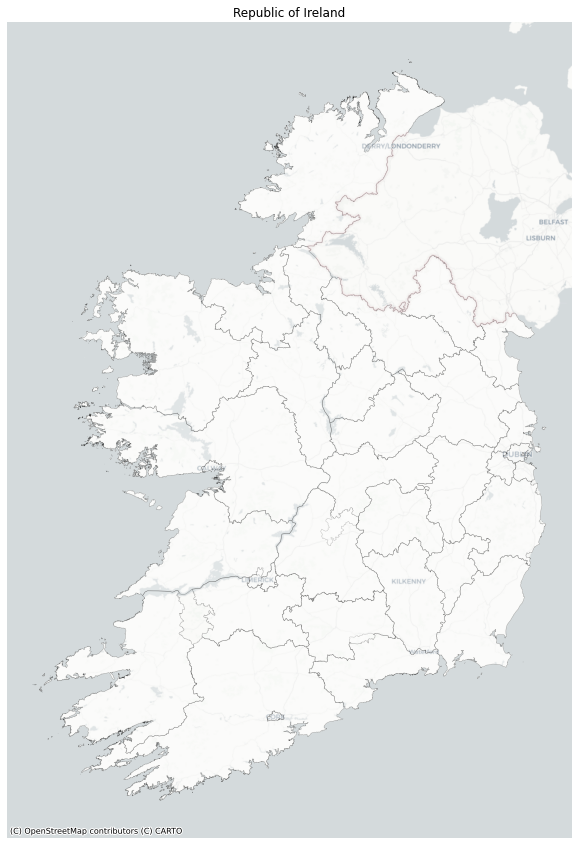

In [38]:
#A map of Ireland based on the 33 areas included in this study
fig, ax = plt.subplots(figsize = (15,15))

All_counties.plot(ax=ax, color = 'white', edgecolor = 'black', lw=0.5, alpha = 0.3)

#No axis
ax.axis('off')

#Add title
plt.title("Republic of Ireland")

#Add a basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

In [39]:
#Export consumption data File
Data = pd.read_excel('/Data/Shared Data/Data DI_Excel.xlsx')

In [40]:
#Sort data by year
Data.sort_values(by = 'Year.x')

,Unnamed: 0,COUNTY,BrickNo,ATC5,AdminRoute,Year.x,Month,TotalDDD,ATC5 Name,Class,CHOArea,LHO_County,Year.y,Absolutescore
34270,34271,Dublin_City,71,J01CR02,O,2015,5,6324.633333,J01CR02 amoxicillin and beta-lactamase inhibitor,NP,9,Dublin North,2016,1.746831
92468,92469,Kilkenny,33,J01XE01,O,2015,2,3496.024560,J01XE01 nitrofurantoin,P,5,Carlow/Kilkenny,2016,0.268778
92473,92474,Kilkenny,33,J01CE01,P,2015,6,50.000000,J01CE01 benzylpenicillin,OOS,5,Carlow/Kilkenny,2016,0.268778
92484,92485,Kilkenny,33,J01XC01,O,2015,7,16.666667,J01XC01 fusidic acid,OOS,5,Carlow/Kilkenny,2016,0.268778
92485,92486,Kilkenny,33,J01CF05,O,2015,7,4173.500000,J01CF05 flucloxacillin,P,5,Carlow/Kilkenny,2016,0.268778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25078,25079,Dublin_City,19,J01MA01,O,2022,1,10.000000,J01MA01 ofloxacin,NP,9,Dublin North,2016,1.746831
25508,25509,Dublin_City,19,J01AA02,O,2022,3,2592.000000,J01AA02 doxycycline,P,9,Dublin North,2016,1.746831
31616,31617,Dublin_City,23,J01DD02,P,2022,3,42.500000,J01DD02 ceftazidime,OOS,9,Dublin North,2016,1.746831
108458,108459,Mayo,3,J01FF01,O,2022,2,331.000000,J01FF01 clindamycin,NP,2,Mayo,2016,0.395315


In [41]:
Data.columns

Index(['Unnamed: 0', 'COUNTY', 'BrickNo', 'ATC5', 'AdminRoute', 'Year.x',
       'Month', 'TotalDDD', 'ATC5 Name', 'Class', 'CHOArea', 'LHO_County',
       'Year.y', 'Absolutescore'],
      dtype='object')

In [42]:
Data = Data.drop('Unnamed: 0', axis=1)

In [43]:
#check type of data
type(Data)

pandas.core.frame.DataFrame

In [44]:
#check type of All_counties
type(All_counties)

geopandas.geodataframe.GeoDataFrame

In [45]:
#Merge consumption data with geographical data
Data_Merged=Data.merge(All_counties, on='COUNTY', how='inner')

#Show the resulting merged data
Data_Merged

,COUNTY,BrickNo,ATC5,AdminRoute,Year.x,Month,TotalDDD,ATC5 Name,Class,CHOArea,LHO_County,Year.y,Absolutescore,lat,long,geometry
0,Carlow,34,J01FA09,O,2020,7,2638.500000,J01FA09 clarithromycin,NP,5,Carlow/Kilkenny,2016,1.157538,-759540.335726,6.933175e+06,"POLYGON ((-776389.274 6947877.845, -775483.380..."
1,Carlow,34,J01DD01,P,2019,7,2.500000,J01DD01 cefotaxime,OOS,5,Carlow/Kilkenny,2016,1.157538,-759540.335726,6.933175e+06,"POLYGON ((-776389.274 6947877.845, -775483.380..."
2,Carlow,34,J01CR02,O,2021,6,4104.966667,J01CR02 amoxicillin and beta-lactamase inhibitor,NP,5,Carlow/Kilkenny,2016,1.157538,-759540.335726,6.933175e+06,"POLYGON ((-776389.274 6947877.845, -775483.380..."
3,Carlow,34,J01MA02,O,2021,6,725.000000,J01MA02 ciprofloxacin,NP,5,Carlow/Kilkenny,2016,1.157538,-759540.335726,6.933175e+06,"POLYGON ((-776389.274 6947877.845, -775483.380..."
4,Carlow,34,J01AA06,O,2019,5,70.000000,J01AA06 oxytetracycline,OOS,5,Carlow/Kilkenny,2016,1.157538,-759540.335726,6.933175e+06,"POLYGON ((-776389.274 6947877.845, -775483.380..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139069,Wicklow,32,J01MA01,O,2020,1,110.000000,J01MA01 ofloxacin,NP,6,Wicklow,2016,0.212934,-709721.165878,6.979055e+06,"MULTIPOLYGON (((-677871.250 7019456.156, -6778..."
139070,Wicklow,32,J01AA07,O,2019,6,25.000000,J01AA07 tetracycline,OOS,6,Wicklow,2016,0.212934,-709721.165878,6.979055e+06,"MULTIPOLYGON (((-677871.250 7019456.156, -6778..."
139071,Wicklow,32,J01XB01,P,2017,1,42.222222,J01XB01 colistin,OOS,6,Wicklow,2016,0.212934,-709721.165878,6.979055e+06,"MULTIPOLYGON (((-677871.250 7019456.156, -6778..."
139072,Wicklow,32,J01EE01,O,2020,2,1831.250000,J01EE01 sulfamethoxazole and trimethoprim,OOS,6,Wicklow,2016,0.212934,-709721.165878,6.979055e+06,"MULTIPOLYGON (((-677871.250 7019456.156, -6778..."


In [46]:
#Deprivation Index (Absolute score) for counties
DI=Data_Merged.groupby('COUNTY')['Absolutescore'].mean()
DI.head(5)

COUNTY
Carlow       1.157538
Cavan        0.730689
Clare        0.061012
Cork        -0.408567
Cork City    2.105261
Name: Absolutescore, dtype: float64

In [47]:
#Write DI an excel sheet
#DI.to_excel('/Volumes/Batates/PhD/Summer Placement/HPSC/Data/Shared Data/DI.xlsx')

In [48]:
#Read DI excel sheet
DI=pd.read_excel('/Volumes/Batates/PhD/Summer Placement/HPSC/Data/Shared Data/DI.xlsx')

In [49]:
#Show top 5 records of DI data frame
DI.head(5)

,COUNTY,Absolutescore
0,Carlow,1.157538
1,Cavan,0.730689
2,Clare,0.061012
3,Cork,-0.408567
4,Cork City,2.105261


In [50]:
#Merge DI data with geographical data of counties
DI_geo=DI.merge(All_counties, on='COUNTY', how='left')
DI_geo.head(5)

,COUNTY,Absolutescore,lat,long,geometry
0,Carlow,1.157538,-7.595403e+05,6.933175e+06,"POLYGON ((-776389.274 6947877.845, -775483.380..."
1,Cavan,0.730689,-8.185283e+05,7.169290e+06,"POLYGON ((-844337.659 7165539.381, -844364.822..."
2,Clare,0.061012,-1.006607e+06,6.953648e+06,"MULTIPOLYGON (((-1009878.637 7012235.408, -101..."
3,Cork,-0.408567,-9.836107e+05,6.785439e+06,"MULTIPOLYGON (((-874219.125 6778675.625, -8744..."
4,Cork City,2.105261,-9.425153e+05,6.781350e+06,"POLYGON ((-942593.541 6785832.533, -942165.686..."


In [51]:
#check type of Data_Merged_3
type(DI_geo)

pandas.core.frame.DataFrame

In [52]:
#Convert Data_Merged_3 dataframe into geodataframe
DI_geo = gpd.GeoDataFrame(DI_geo, crs = 'EPSG:3857',geometry=DI_geo.geometry)

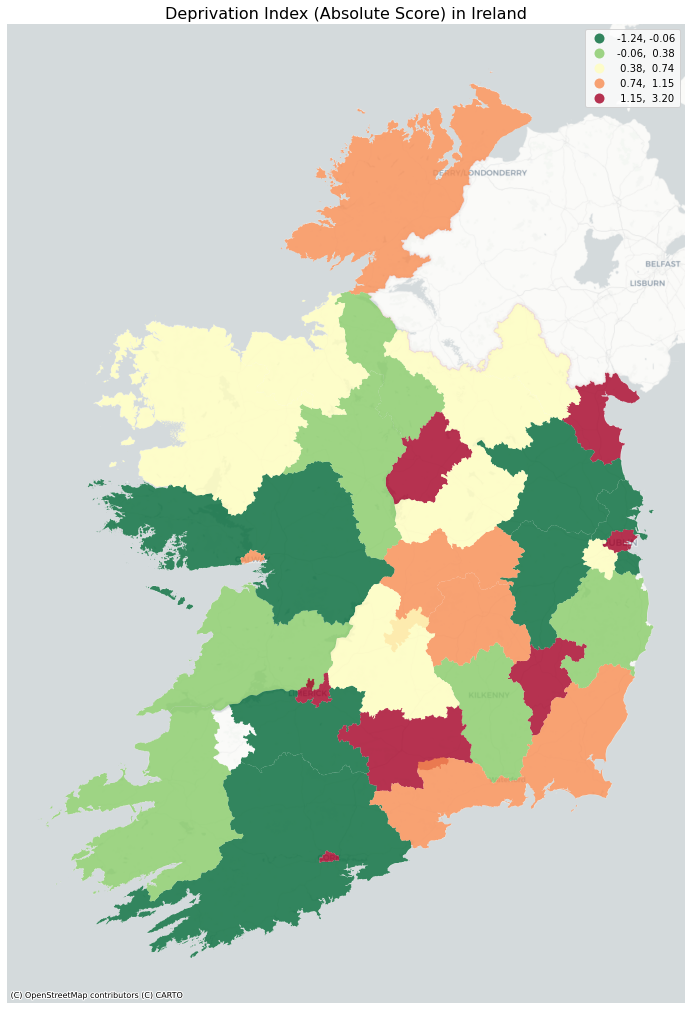

In [53]:
# A map for absolute deprivation index
fig, ax = plt.subplots(figsize=(18,18))

#group blocks
DI_geo.plot(ax=ax, column= "Absolutescore", legend=True, alpha=0.8, cmap='RdYlGn_r',scheme='quantiles')

#labels
#DI_geo.apply(lambda x: ax.annotate(text=x['COUNTY'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

# title
ax.set_title('Deprivation Index (Absolute Score) in Ireland', size =16)

#no axis
ax.axis('off')

#add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

In [54]:
#Import data for antimicrobial consumption rates (in DIDs)
Rates_data=pd.read_csv('/Shared Data/Data_month_rate (J01).csv')

In [55]:
#Show top 5 records
Rates_data.head(5)

,Unnamed: 0,COUNTY,Year,Month,TotalDDD,Population,days,Rate,Absolutescore,Female,Male,under 12,Timec
0,1,Carlow,2015,1,48620.084614,55676,31,28.169944,1.157538,28467,28465,9343,0
1,2,Cavan,2015,1,58403.063196,74609,31,25.251240,0.730689,37846,38330,13177,0
2,3,Clare,2015,1,73949.490577,119479,31,19.965579,0.061012,60032,58785,18663,0
3,4,Cork,2015,1,321394.651930,407590,31,25.436270,-0.408567,210258,206953,71809,0
4,5,Cork City,2015,1,154318.193182,121552,31,40.953717,2.105261,63935,61722,13447,0


In [56]:
#"Rates" grouped by county & year
AM_rates=Rates_data.groupby(['COUNTY','Year'])['Rate'].mean()

In [57]:
#Show rates grouped by county & year
AM_rates

COUNTY   Year
Carlow   2015    26.271639
         2016    25.627425
         2017    25.604635
         2018    26.643226
         2019    26.732350
                   ...    
Wicklow  2018    17.787899
         2019    17.912950
         2020    14.802901
         2021    13.816882
         2022    15.565327
Name: Rate, Length: 264, dtype: float64

In [59]:
#Rates grouped by county
Rates=Rates_data.groupby(['COUNTY'])['Rate'].mean()

In [60]:
# show "Rates" grouped by county
Rates

COUNTY
Carlow             24.555447
Cavan              20.208565
Clare              17.442158
Cork               17.099746
Cork City          31.549188
Donegal            22.667427
Dublin_City        13.679879
Dublin_Dun         23.217706
Dublin_Fin         13.871602
Dublin_South       29.388237
Galway             19.318802
Galway City        23.937966
Kerry              20.487750
Kildare            17.926498
Kilkenny           22.781391
Laois              19.581603
Leitrim            20.808864
Limerick           13.369090
Limerick City      56.700692
Longford           26.112755
Louth              20.558433
Mayo               25.371943
Meath              16.425089
Monaghan           18.512210
Offaly             18.831327
Roscommon          16.540346
Sligo              18.784605
Tipperary North    21.896493
Tipperary South    21.911232
Waterford          20.367804
Westmeath          25.722827
Wexford            19.116932
Wicklow            16.816548
Name: Rate, dtype: float64

In [61]:
#Write Rates grouped by county to an excel sheet
Rates.to_excel('/Shared Data/MeanConsumptionRates_01Dec.xlsx')

In [62]:
#Write Rates grouped by county to an excel sheet
AM_consumption_rates=pd.read_excel('/Shared Data/MeanConsumptionRates_01Dec.xlsx')

In [63]:
#Show first 2 records
AM_consumption_rates.head(2)

,COUNTY,Rate
0,Carlow,24.555447
1,Cavan,20.208565


In [64]:
# Merge rates data with geographical data
Rates_geo=AM_consumption_rates.merge(All_counties, on='COUNTY', how='left')

In [65]:
#Show first 2 records
Rates_geo.head(2)

,COUNTY,Rate,lat,long,geometry
0,Carlow,24.555447,-759540.335726,6.933175e+06,"POLYGON ((-776389.274 6947877.845, -775483.380..."
1,Cavan,20.208565,-818528.300678,7.169290e+06,"POLYGON ((-844337.659 7165539.381, -844364.822..."


In [66]:
#Check type
type(Rates_geo)

pandas.core.frame.DataFrame

In [67]:
#Convert pandas dataframe into geodataframe
Rates_geo = gpd.GeoDataFrame(Rates_geo, crs = 'EPSG:3857',geometry=Rates_geo.geometry)

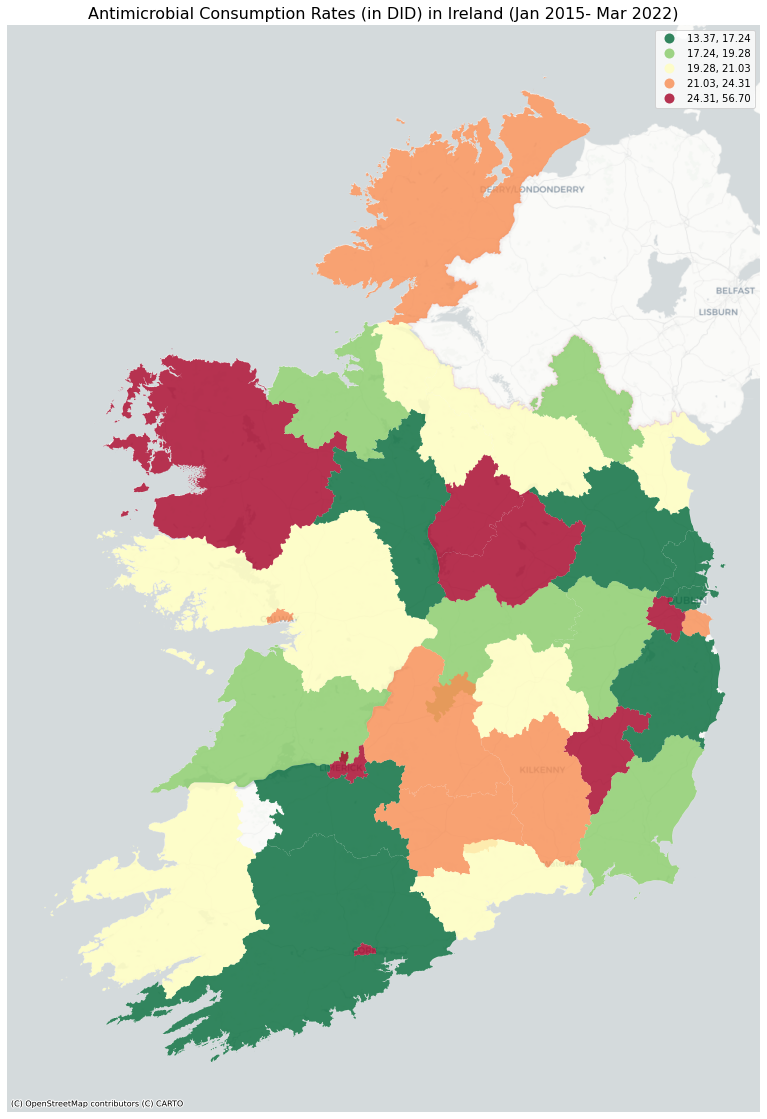

In [68]:
# A map for antimicrobial consumption rates (in DIDs)
fig, ax = plt.subplots(figsize=(20,20))

Rates_geo.plot(ax=ax, column= "Rate", legend=True, alpha=0.8, cmap='RdYlGn_r', scheme='quantiles')

ax.set_title('Antimicrobial Consumption Rates (in DID) in Ireland (Jan 2015- Mar 2022)', size = 16)

#Rate_geo.apply(lambda x: ax.annotate(text=x['COUNTY'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

ax.axis('off')

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

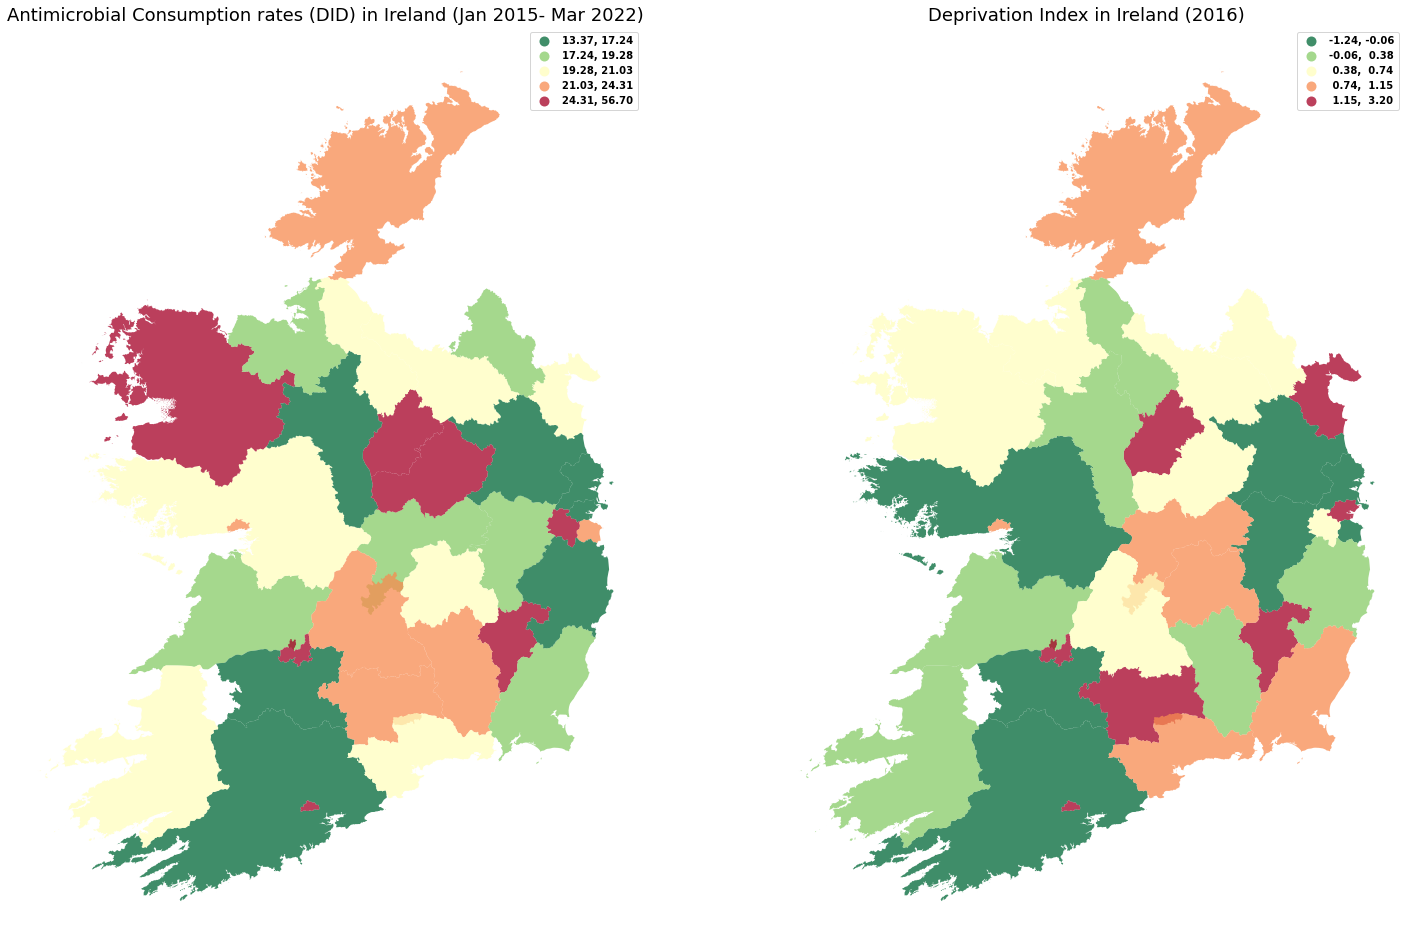

In [69]:
#A map for AM consumption rates and absolute DI
fig, ax = plt.subplots(1, 2, figsize=(25, 25))

Rates_geo.plot(ax=ax[0], 
         column='Rate', 
         cmap='RdYlGn_r', 
         scheme='quantiles',
         k=5, 
         edgecolor='white', 
         linewidth=0, 
         alpha=0.75, 
         legend=True,
         legend_kwds={'loc': 'upper right', 'fontsize': 16, 'prop': FontProperties(weight='bold')}
         )


ax[0].axis("off")
ax[0].set_title("Antimicrobial Consumption rates (DID) in Ireland (Jan 2015- Mar 2022)", size = 18)
#Rates_geo.apply(lambda x: ax[0].annotate(text=x['COUNTY'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

DI_geo.plot(ax=ax[1], 
         column='Absolutescore',
         cmap='RdYlGn_r', 
         scheme='quantiles',
         k=5, 
         edgecolor='white', 
         linewidth=0, 
         alpha=0.75,
         legend=True,
         legend_kwds={'loc': 'upper right', 'fontsize': 16, 'prop': FontProperties(weight='bold')}
         )

ax[1].axis("off")
ax[1].set_title("Deprivation Index in Ireland (2016)", size = 18)
#DI_geo.apply(lambda x: ax[1].annotate(text=x['COUNTY'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

plt.show()

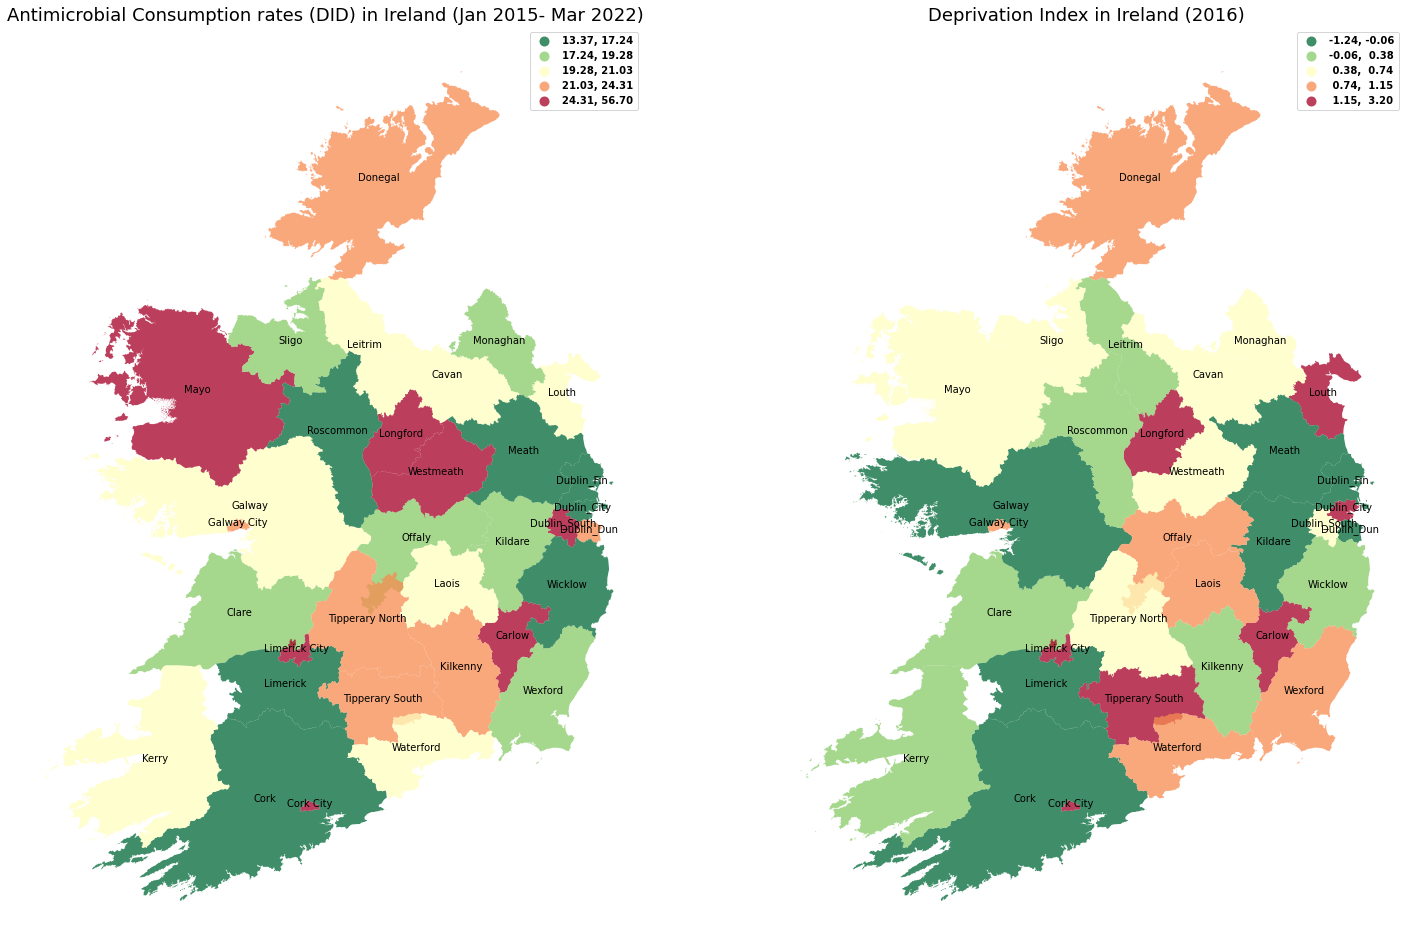

In [70]:
#A map for AM consumption rates and absolute DI
fig, ax = plt.subplots(1, 2, figsize=(25, 25))

Rates_geo.plot(ax=ax[0], 
         column='Rate', 
         cmap='RdYlGn_r', 
         scheme='quantiles',
         k=5, 
         edgecolor='white', 
         linewidth=0, 
         alpha=0.75, 
         legend=True,
         legend_kwds={'loc': 'upper right', 'fontsize': 16, 'prop': FontProperties(weight='bold')}
         )


ax[0].axis("off")
ax[0].set_title("Antimicrobial Consumption rates (DID) in Ireland (Jan 2015- Mar 2022)", size = 18)
Rates_geo.apply(lambda x: ax[0].annotate(text=x['COUNTY'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

DI_geo.plot(ax=ax[1], 
         column='Absolutescore',
         cmap='RdYlGn_r', 
         scheme='quantiles',
         k=5, 
         edgecolor='white', 
         linewidth=0, 
         alpha=0.75,
         legend=True,
         legend_kwds={'loc': 'upper right', 'fontsize': 16, 'prop': FontProperties(weight='bold')}
         )

ax[1].axis("off")
ax[1].set_title("Deprivation Index in Ireland (2016)", size = 18)
DI_geo.apply(lambda x: ax[1].annotate(text=x['COUNTY'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

plt.show()

In [71]:
#Import data for red antimicrobials
Red_data=pd.read_csv('/Shared Data/RED_Data_rate_year_county.csv')

In [72]:
#Show first 2 records
Red_data.head(2)

,Unnamed: 0,COUNTY,Year,TotalDDD,Population,days,Rate,Absolutescore,Female,Male,under 12
0,1,Carlow,2015,290778.416667,55676,365,14.308736,1.157538,28467,28465,9343
1,2,Carlow,2016,314720.150000,56932,365,15.145208,1.157538,28467,28465,9343


In [73]:
#Red AM rates grouped by county
Stat3=Red_data.groupby(['COUNTY'])['Rate'].mean()

In [74]:
#Show top 2 records
Stat3.head(2)

COUNTY
Carlow    10.920064
Cavan      7.959106
Name: Rate, dtype: float64

In [75]:
#Write red AM consumption rates to excel sheet
Stat3.to_excel('/Shared Data/GroupedBy_Red_Data.xlsx')

In [76]:
#Read red AM consumption rates excel sheet
to_merge_red=pd.read_excel('/Shared Data/GroupedBy_Red_Data.xlsx')

In [77]:
#Merge red AM consumption and geographical data
Red_merge=to_merge_red.merge(All_counties, on='COUNTY', how='left')

In [78]:
#Show top 2 records of merged data
Red_merge.head(2)

,COUNTY,Rate,lat,long,geometry
0,Carlow,10.920064,-759540.335726,6.933175e+06,"POLYGON ((-776389.274 6947877.845, -775483.380..."
1,Cavan,7.959106,-818528.300678,7.169290e+06,"POLYGON ((-844337.659 7165539.381, -844364.822..."


In [79]:
#Convert pandas dataframe into geodataframe
Red_merge = gpd.GeoDataFrame(Red_merge, crs = 'EPSG:3857',geometry=Rates_geo.geometry)

In [80]:
#Import data for green antimicrobials
Green_data=pd.read_csv('/Shared Data/GREEN_Data_rate_year_county.csv')

In [81]:
#Green rates grouped by county
Stat4=Green_data.groupby(['COUNTY'])['Rate'].mean()

In [82]:
#Write Green rates grouped by county to an excel sheet
Stat4.to_excel('/Shared Data/GroupedBy_Green_Data.xlsx')

In [83]:
#Write Green rates grouped by county to an excel sheet
to_merge_green=pd.read_excel('/Shared Data/GroupedBy_Green_Data.xlsx')

In [84]:
# Merge Green rates data with geographical data 
Green_merge=to_merge_green.merge(All_counties, on='COUNTY', how='left')

In [85]:
#Convert pandas dataframe into geodataframe
Green_merge = gpd.GeoDataFrame(Green_merge, crs = 'EPSG:3857',geometry=Rates_geo.geometry)

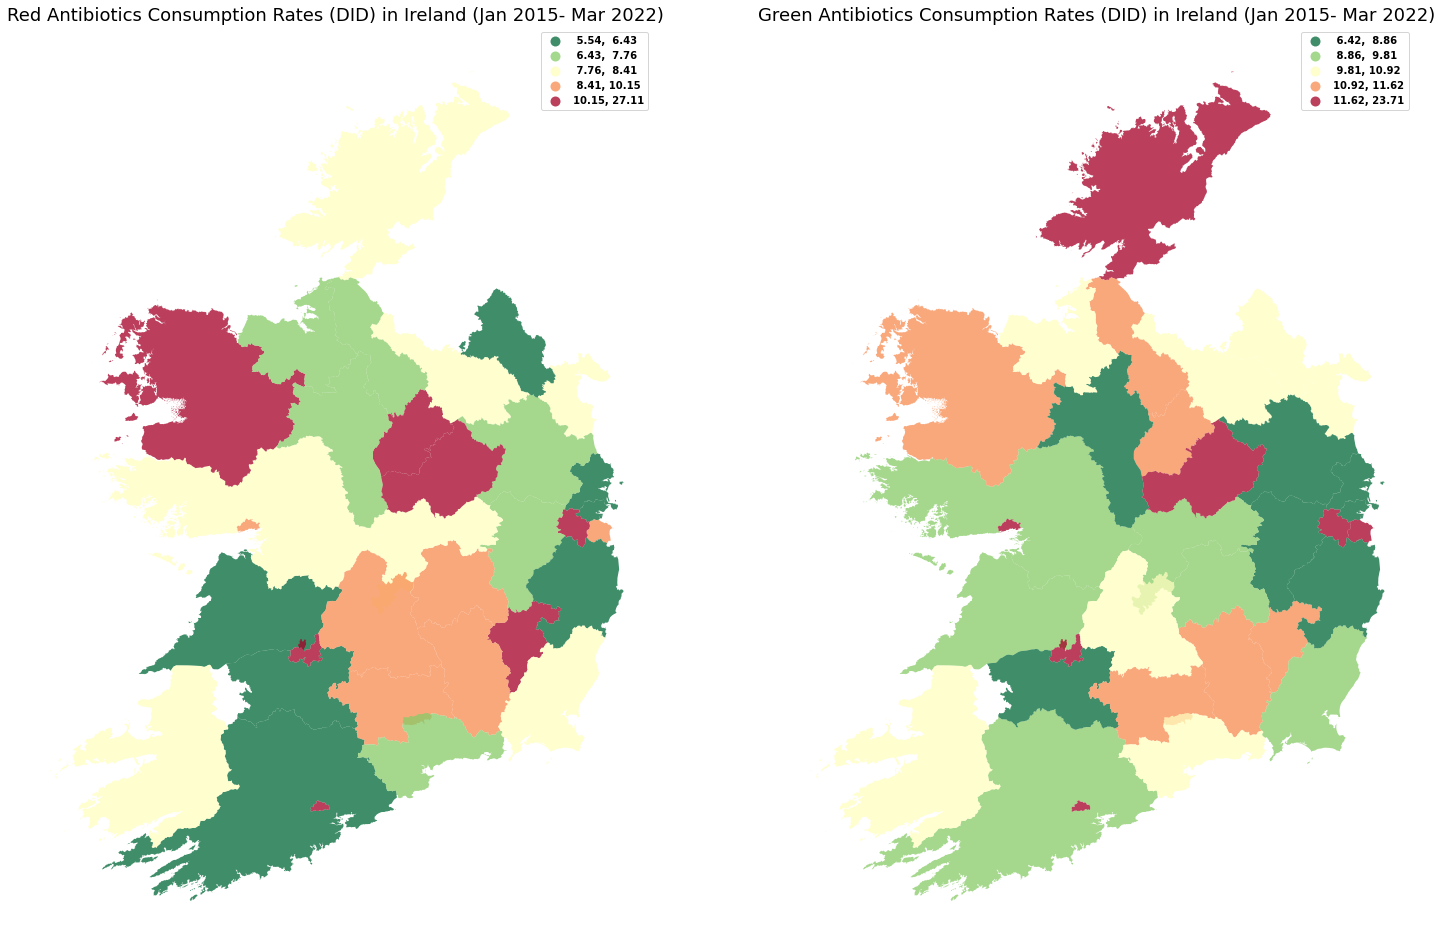

In [86]:
#Maps for red vs green AM consumption rates
fig, ax = plt.subplots(1, 2, figsize=(25, 25))

Red_merge.plot(ax=ax[0], 
         column='Rate', 
         cmap='RdYlGn_r', 
         scheme='quantiles',
         k=5, 
         edgecolor='white', 
         linewidth=0, 
         alpha=0.75,
         legend=True,
         legend_kwds={'loc': 'upper right', 'fontsize': 16, 'prop': FontProperties(weight='bold')}
           )


ax[0].axis("off")
ax[0].set_title("Red Antibiotics Consumption Rates (DID) in Ireland (Jan 2015- Mar 2022)", size = 18)
#Red_merge.apply(lambda x: ax[0].annotate(text=x['COUNTY'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)


Green_merge.plot(ax=ax[1], 
         column='Rate', 
         cmap='RdYlGn_r', 
         scheme='quantiles',
         k=5, 
         edgecolor='white', 
         linewidth=0, 
         alpha=0.75,
         legend=True,
         legend_kwds={'loc': 'upper right', 'fontsize': 16, 'prop': FontProperties(weight='bold')}
           )

ax[1].axis("off")
ax[1].set_title("Green Antibiotics Consumption Rates (DID) in Ireland (Jan 2015- Mar 2022)", size = 18)
#Green_merge.apply(lambda x: ax[1].annotate(text=x['COUNTY'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

plt.show()

In [87]:
#Split data to before and during covid
#before covid_19: 2015-2019
Before_covid= Rates_data[Rates_data["Year"].isin([2015,2016,2017,2018,2019])]

In [88]:
#Check min year in before covid_19 split data
min(Before_covid["Year"])

2015

In [89]:
#Check max year in before covid_19 split data
max(Before_covid["Year"])

2019

In [90]:
#During covid_19: 2020-2022
After_covid= Rates_data[Rates_data["Year"].isin([2020, 2021, 2022])]

In [91]:
#Check min year in during covid_19 split data
min(After_covid["Year"])

2020

In [92]:
#Check max year in during covid_19 split data
max(After_covid["Year"])

2022

In [93]:
#Before covid_19 rates grouped by county
Stat5=Before_covid.groupby(['COUNTY'])['Rate'].mean()

In [94]:
#Write before covid-19 rates to excel sheet
Stat5.to_excel('/Shared Data/Before_covid.xlsx')

In [95]:
#read before covid_19 data
to_merge_before_covid=pd.read_excel('/Shared Data/Before_covid.xlsx')

In [96]:
#Merge before covid-19 data with geographical data
Before_covid_merge=to_merge_before_covid.merge(All_counties, on='COUNTY', how='left')

In [97]:
#Convert pandas dataframe into geodataframe
Before_covid_merge = gpd.GeoDataFrame(Before_covid_merge, crs = 'EPSG:3857',geometry=Rates_geo.geometry)

In [98]:
#During covid-19 AM consumption rates grouped by county
Stat6=After_covid.groupby(['COUNTY'])['Rate'].mean()

In [99]:
#Write during covid-19 AM consumption rates grouped by county
Stat6.to_excel('/Shared Data/During_covid.xlsx')

In [100]:
#Read during covid-19 AM consumption rates grouped by county
to_merge_after_covid=pd.read_excel('/Shared Data/During_covid.xlsx')

In [101]:
#Merge during covid-19 AM consumption rates grouped by county with geographical data
During_covid_merge=to_merge_after_covid.merge(All_counties, on='COUNTY', how='left')

In [102]:
#Convert pandas dataframe into geodataframe
During_covid_merge = gpd.GeoDataFrame(During_covid_merge, crs = 'EPSG:3857',geometry=Rates_geo.geometry)

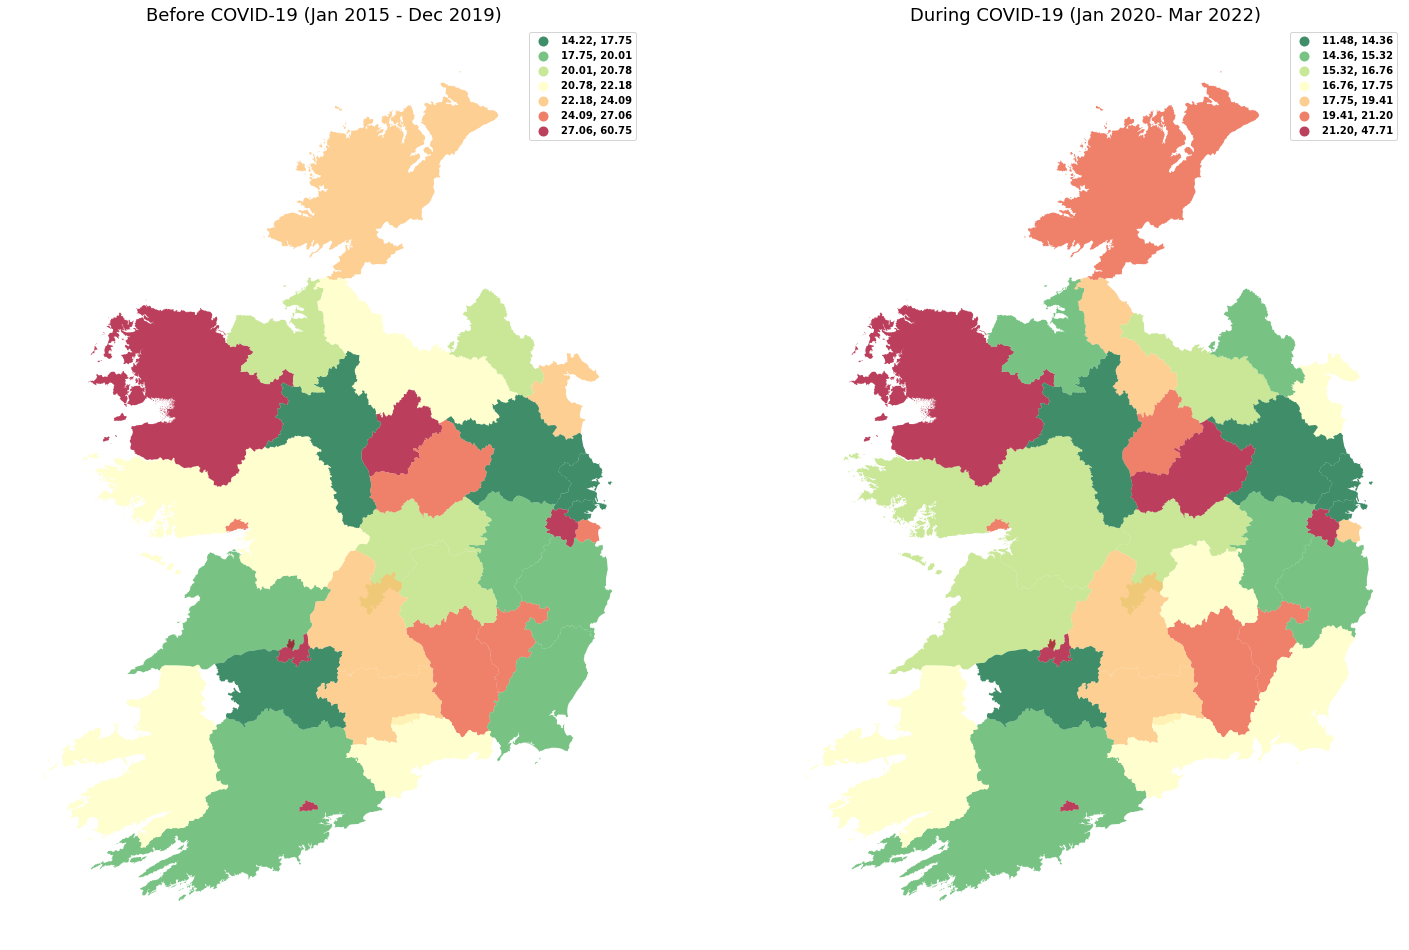

In [103]:
#Before vs during Covid-19 AM consumption rates in Ireland
fig, ax = plt.subplots(1, 2, figsize=(25, 25))


Before_covid_merge.plot(ax=ax[0], 
         column='Rate', 
         cmap='RdYlGn_r', 
         scheme='quantiles',
         k=7, 
         edgecolor='white', 
         linewidth=0, 
         alpha=0.75, 
         legend= True,
         legend_kwds={'loc': 'upper right', 'fontsize': 16, 'prop': FontProperties(weight='bold')}
           )


ax[0].axis("off")
ax[0].set_title("Before COVID-19 (Jan 2015 - Dec 2019)", size = 18)
#Before_covid_merge.apply(lambda x: ax[0].annotate(text=x['COUNTY'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)


During_covid_merge.plot(ax=ax[1], 
         column='Rate', 
         cmap='RdYlGn_r', 
         scheme='quantiles',
         k=7, 
         edgecolor='white', 
         linewidth=0, 
         alpha=0.75,
         legend= True,
         legend_kwds={'loc': 'upper right', 'fontsize': 16, 'prop': FontProperties(weight='bold')}
           )

ax[1].axis("off")
ax[1].set_title("During COVID-19 (Jan 2020- Mar 2022)", size = 18)
#During_covid_merge.apply(lambda x: ax[1].annotate(text=x['COUNTY'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

plt.show()

In [105]:
#Calculate spatial weights
wq = lps.weights.KNN.from_dataframe(Rates_geo,k=8)

#Row standardization
wq.transform = 'r'

In [106]:
#Global Moran
#A measure of the overall clustering of the spatial data
moran = esda.moran.Moran(Rates_geo["Rate"], wq)

In [107]:
#If the values in the dataset tend to cluster spatially (high values cluster near other high values; 
#low values cluster near other low values), the Moran's Index will be positive. When high values repel other high 
#values, and tend to be near low values, the Index will be negative.
moran.I

-0.049124949016242474

In [108]:
#Z score under normality assumption
moran.z_norm

-0.2558282491137348

In [109]:
#P-value under normality assumption
moran.p_norm

0.7980834599436861

(<Figure size 720x288 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Reference Distribution'}, xlabel='Moran I: -0.05', ylabel='Density'>,
        <AxesSubplot:title={'center':'Moran Scatterplot (-0.05)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
       dtype=object))

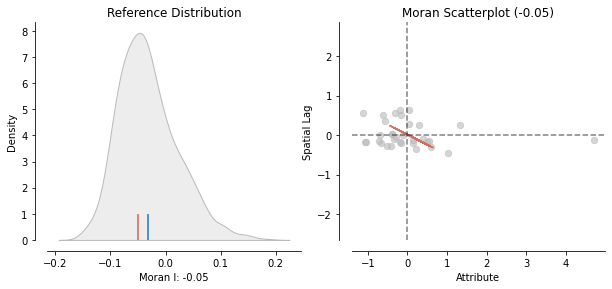

In [110]:
#The blue line is the mean of 999 simulations of random maps, while the red line is Moran's I
#Moran's I of the observed pattern is lower than the mean created by randomness
plot_moran(moran)

In [111]:
# create a new column for the spatial lag
# Spatial lag is the variable that averages the neighboring values of a location
Rates_geo['Rate_lag']=lps.weights.lag_spatial(wq,Rates_geo['Rate'])

In [112]:
Rates_geo["Rate_std"] = Rates_geo["Rate"] - Rates_geo["Rate"].mean()
Rates_geo["Rate_lag_std"] = Rates_geo["Rate_lag"] - Rates_geo["Rate"].mean()

In [113]:
# Moran Loc/ LISA: to identify cases in which the value of an observation and the average of its surroundings
#is either more similar (HH or LL in the scatterplot above) or dissimilar (HL, LH) 
#than we would expect from pure chance
moran_loc = Moran_Local(Rates_geo["Rate"], wq)

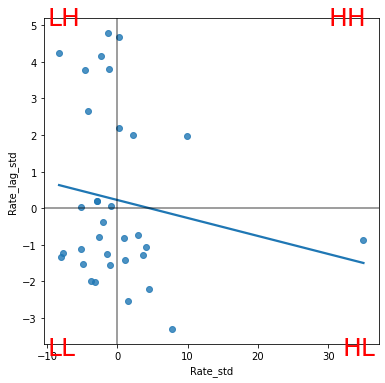

In [114]:
# LISA quadrant plot
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(6, 6))
# Plot values
seaborn.regplot(x="Rate_std", y="Rate_lag_std", data=Rates_geo, ci=None)

# Add vertical and horizontal lines
plt.axvline(0, c="k", alpha=0.5)
plt.axhline(0, c="k", alpha=0.5)

# Add text labels for each quadrant
plt.text(30, 5, "HH", fontsize=25, c="r")
plt.text(32, -4, "HL", fontsize=25, c="r")
plt.text(-10, 5, "LH", fontsize=25, c="r")
plt.text(-10, -4, "LL", fontsize=25, c="r")

# Display
plt.show()

In [115]:
#lisa: local indicators of spatial autocorrelation
lisa = esda.moran.Moran_Local(Rates_geo["Rate"], wq)

In [116]:
#Local I statistic for every county
lisa.Is

array([-0.03654297,  0.03232586, -0.19745641, -0.30379295,  0.34156478,
       -0.01416134,  0.18776733, -0.06803807,  0.1665738 , -0.44585467,
       -0.172835  ,  0.07901567, -0.07973513,  0.13113187, -0.02716377,
        0.01394083, -0.00086482, -0.61898329, -0.5326904 , -0.17109804,
        0.0306705 , -0.08333888,  0.10246782,  0.11171837, -0.01029672,
       -0.00288803, -0.00950842,  0.00816566,  0.01860907, -0.11071624,
       -0.07480733,  0.03548397,  0.12933858])

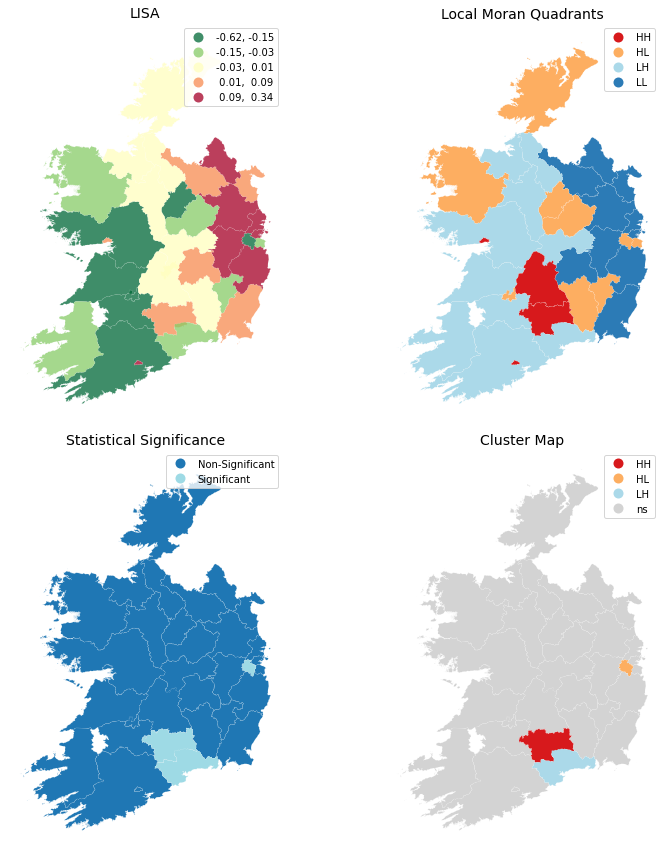

In [117]:
# Set up figure and axes
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()

# Map #1: local statistics
ax = axs[0]
# Assign new column with local statistics on-the-fly
Rates_geo.assign(Is=lisa.Is).plot(
    column="Is",
    cmap="RdYlGn_r",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.1,
    alpha=0.75,
    legend=True,
    ax=ax,
)
axs[0].set_title("LISA", size = 14)
axs[0].axis("off")

# Map #2: Quadrant categories
# p (significance level) = 1, so that all  observations are treated as "significant" and are assigned
# a quadrant color
ax = axs[1]
esdaplot.lisa_cluster(lisa, Rates_geo, p=1, ax=ax)
axs[1].set_title("Local Moran Quadrants", size = 14)
axs[1].axis("off")

# Map #3: Significance map
ax = axs[2]

labels = pd.Series(1 * (lisa.p_sim < 0.05),  index=Rates_geo.index).map({1: "Significant", 0: "Non-Significant"})
 
Rates_geo.assign(cl=labels).plot(
    column="cl",
    categorical=True,
    k=2,
    cmap="tab20",
    linewidth=0.1,
    edgecolor="white",
    legend=True,
    ax=ax,
)
axs[2].set_title("Statistical Significance", size = 14)
axs[2].axis("off")

# Map #4: Cluster map

ax = axs[3]

esdaplot.lisa_cluster(lisa, Rates_geo, p=0.05, ax=ax)

axs[3].set_title("Cluster Map", size = 14)
#Rates_geo.apply(lambda x: axs[3].annotate(text=x['COUNTY'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
axs[3].axis("off")

f.tight_layout()

# Display the figure
plt.show()

In [118]:
# To get percentage of counties that are part of spatial cluster
# 9%
(lisa.p_sim < 0.05).sum() * 100 / len(lisa.p_sim)

9.090909090909092